<a href="https://colab.research.google.com/github/ashraf-badalov/ml-projects/blob/master/Mushroom_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv("mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
from sklearn.preprocessing import LabelEncoder

mappings = list()

encoder = LabelEncoder()
for column in range(len(data.columns)):
  data[data.columns[column]] = encoder.fit_transform(data[data.columns[column]])
  mappings_ = {index : label for index, label in enumerate(encoder.classes_)}
  mappings.append(mappings_)

In [4]:
mappings

[{0: 'e', 1: 'p'},
 {0: 'b', 1: 'c', 2: 'f', 3: 'k', 4: 's', 5: 'x'},
 {0: 'f', 1: 'g', 2: 's', 3: 'y'},
 {0: 'b',
  1: 'c',
  2: 'e',
  3: 'g',
  4: 'n',
  5: 'p',
  6: 'r',
  7: 'u',
  8: 'w',
  9: 'y'},
 {0: 'f', 1: 't'},
 {0: 'a', 1: 'c', 2: 'f', 3: 'l', 4: 'm', 5: 'n', 6: 'p', 7: 's', 8: 'y'},
 {0: 'a', 1: 'f'},
 {0: 'c', 1: 'w'},
 {0: 'b', 1: 'n'},
 {0: 'b',
  1: 'e',
  2: 'g',
  3: 'h',
  4: 'k',
  5: 'n',
  6: 'o',
  7: 'p',
  8: 'r',
  9: 'u',
  10: 'w',
  11: 'y'},
 {0: 'e', 1: 't'},
 {0: '?', 1: 'b', 2: 'c', 3: 'e', 4: 'r'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'p'},
 {0: 'n', 1: 'o', 2: 'w', 3: 'y'},
 {0: 'n', 1: 'o', 2: 't'},
 {0: 'e', 1: 'f', 2: 'l', 3: 'n', 4: 'p'},
 {0: 'b', 1: 'h', 2: 'k', 3: 'n', 4: 'o', 5: 'r', 6: 'u', 7: 'w', 8: 'y'},
 {0: 'a', 1: 'c', 2: 'n', 3: 's', 4: 'v', 5: 'y

In [5]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [30]:
#Checking for whether data is Imbalance or not
data['class'].value_counts()

0    4208
1    3916
Name: class, dtype: int64

In [66]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [95]:
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier(max_depth=10)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
acc = accuracy_score(predictions, y_test)
print(f'Accuracy: {acc}')

Accuracy: 1.0


In [11]:
clf.feature_importances_

array([0.        , 0.        , 0.00227879, 0.0275155 , 0.00470618,
       0.        , 0.        , 0.12247387, 0.34250978, 0.02703231,
       0.05020705, 0.        , 0.00264837, 0.        , 0.01669018,
       0.        , 0.        , 0.00078512, 0.        , 0.20348911,
       0.18126978, 0.01839396])

In [15]:
feature_importance = pd.DataFrame(clf.feature_importances_, index = X.columns, columns = ['Importance']).sort_values(by='Importance', ascending=False)
feature_importance[:10]

,Importance
gill-color,0.342510
spore-print-color,0.203489
population,0.181270
gill-size,0.122474
odor,0.039326
bruises,0.027515
stalk-shape,0.027032
stalk-color-below-ring,0.016690
stalk-root,0.015254
habitat,0.014020


<Axes: >

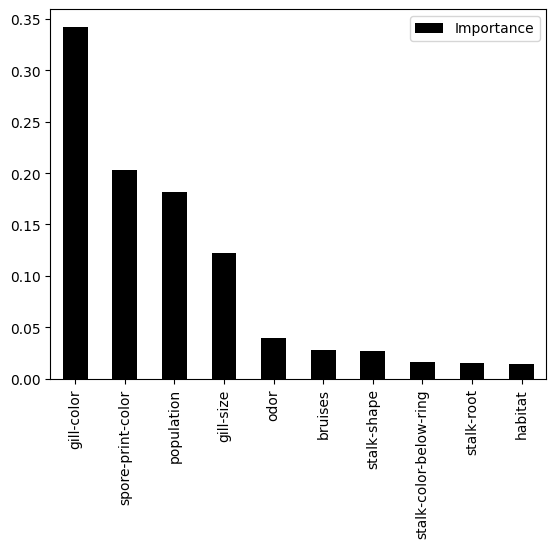

In [88]:
feature_importance[:10].plot(kind='bar', color ='black')

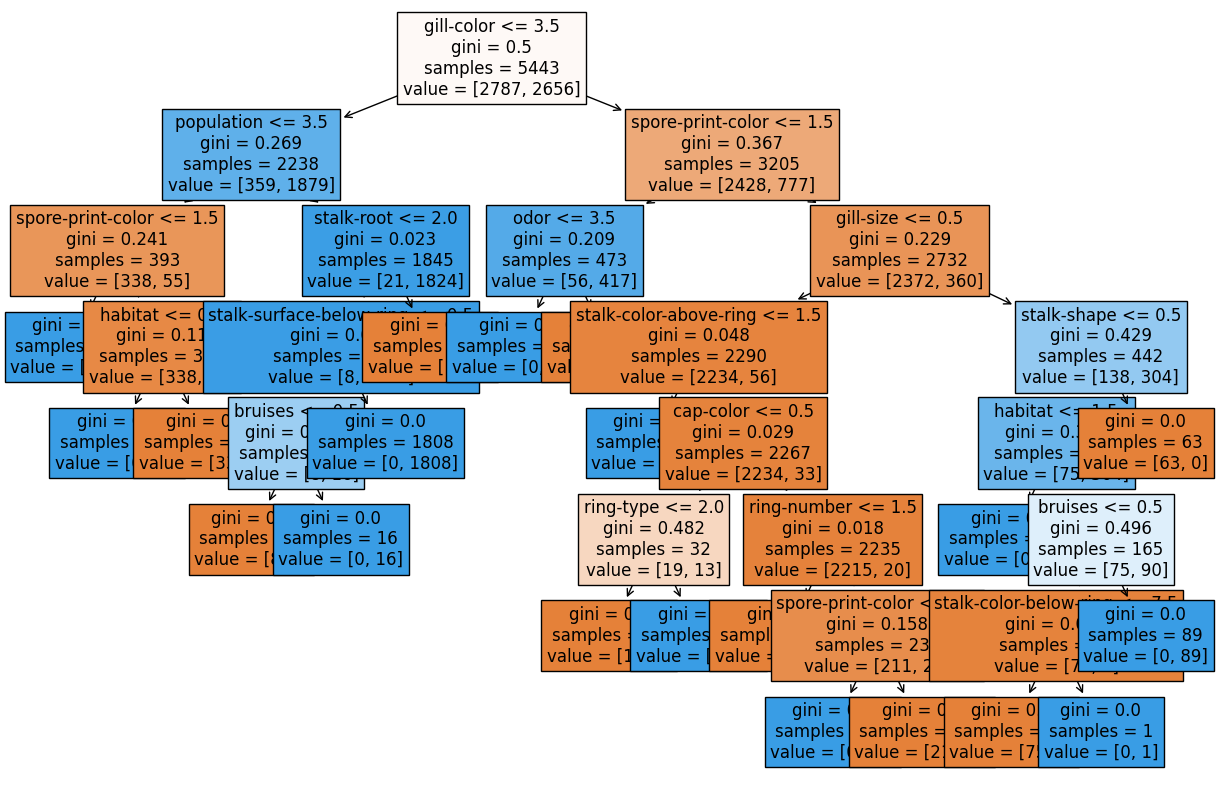

In [96]:
from sklearn import tree
fig = plt.figure(figsize = (15,10))
_ = tree.plot_tree(clf,
                   feature_names = X.columns,
                   filled = True,
                   fontsize = 12)

In [76]:
from sklearn.model_selection import cross_val_score

layer_options = [2,4,6,8,10]
ccp_alpha_options = np.arange(0.0, 0.5, 0.01)

best_score = 0
best_layer = None
best_ccp_alpha = None

for layers in layer_options:
  for ccp_alpha in ccp_alpha_options:
    clf = DecisionTreeClassifier(max_depth = layers, ccp_alpha = ccp_alpha)

    scores = cross_val_score(clf, X, y, cv=5)
    mean_score = np.mean(scores)

    if mean_score>best_score:
      best_score = mean_score
      best_layer = layers
      best_ccp_alpha = ccp_alpha

print(f"Best Number of Layers: {best_layer}")
print(f"Best ccp_alpha Value: {best_ccp_alpha}")
print(f"Best Cross Validation Score: {best_score}")

Best Number of Layers: 10
Best ccp_alpha Value: 0.0
Best Cross Validation Score: 0.9610985979537704
